In [1]:
import numpy as np
import pandas as pd
from scipy import linalg
from scipy import misc
import os
import imageio
import math
import glob
import matplotlib.pyplot as plt

In [2]:
def import_images(path_name):
    images = []
    for num in range(1,5001):
        images.append(imageio.imread('cats/' + str(num) + '.jpg').flatten().reshape(4096,3))
    return np.array(images)
DATA_PATH_DIRECTORY = 'cats'

In [3]:
# This is a mehod only for organizing the data and to explain the color dimensions
def get_rgb_components(image_data):
    red_data = image_data[:,:,0]
    green_data = image_data[:,:,1]
    blue_data = image_data[:,:,2]
    return np.array([red_data, green_data, blue_data])

In [4]:
def get_svd_components(image_data):
    components = get_rgb_components(image_data)
    svd_red = np.linalg.svd(components[0])
    svd_red = [svd_red[0], np.diag(svd_red[1]), svd_red[2]]
    svd_green = np.linalg.svd(components[1])
    svd_green = [svd_green[0], np.diag(svd_green[1]), svd_green[2]]
    svd_blue = np.linalg.svd(components[2])
    svd_blue = [svd_blue[0], np.diag(svd_blue[1]), svd_blue[2]]
    return [svd_red, svd_green, svd_blue]

In [5]:
def get_k_principal_components(s, v_t, k):
    eigenvalues = np.square(np.diag(s))
    print('Proportion of variance preserved: ' + str(np.sum(eigenvalues[0:k]) / np.sum(eigenvalues)))
    for idx in range(k):
        print('Proportion of variance explained by eigenvalue ' + str(idx) + ' : ' + str(eigenvalues[idx] / (np.sum(eigenvalues))))
    return v_t[0:k]

In [6]:
def rgb_pcs(components, k):
    print('PC analysis for red color: ')
    red_pcs = get_k_principal_components(components[0][1], components[0][2], k)
    print('PC analysis for green color: ')
    green_pcs = get_k_principal_components(components[1][1], components[1][2], k)
    print('PC analysis for blue color: ')
    blue_pcs = get_k_principal_components(components[2][1], components[2][2], k)
    return [red_pcs, green_pcs, blue_pcs]

In [7]:
def apply_pca(image_data, k, sample_size):
    svd_comp = get_svd_components(image_data)
    pcs = rgb_pcs(svd_comp, k)
    rgb = []
    for color in range(3):
        rgb.append(np.dot(svd_comp[color][0][0:sample_size, 0: 4096], np.dot(svd_comp[color][1][:, 0:k], svd_comp[color][2][0:k])))
    return np.array(rgb)

PC analysis for red color: 
Proportion of variance preserved: 0.9429543502314454
Proportion of variance explained by eigenvalue 0 : 0.8655538273524259
Proportion of variance explained by eigenvalue 1 : 0.023215160158111377
Proportion of variance explained by eigenvalue 2 : 0.0184029448145496
Proportion of variance explained by eigenvalue 3 : 0.012236007514589491
Proportion of variance explained by eigenvalue 4 : 0.00564648782020903
Proportion of variance explained by eigenvalue 5 : 0.004512292983287651
Proportion of variance explained by eigenvalue 6 : 0.004386308641114513
Proportion of variance explained by eigenvalue 7 : 0.003455723474857542
Proportion of variance explained by eigenvalue 8 : 0.003064709261186065
Proportion of variance explained by eigenvalue 9 : 0.0024808882111143743
PC analysis for green color: 
Proportion of variance preserved: 0.9310301819610497
Proportion of variance explained by eigenvalue 0 : 0.8425230088999569
Proportion of variance explained by eigenvalue 1 :

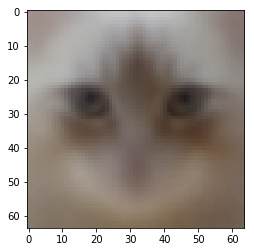

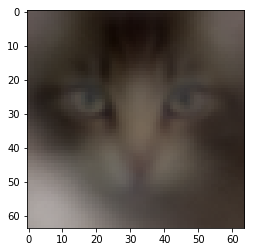

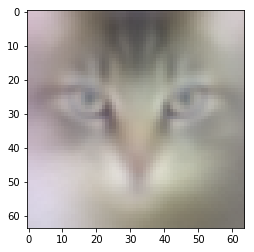

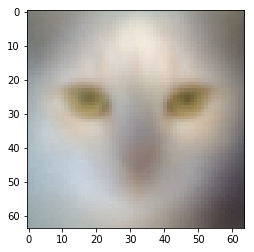

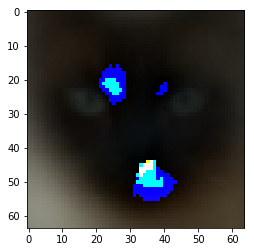

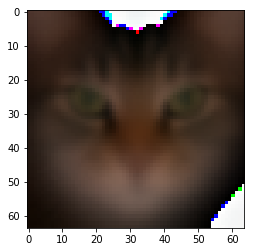

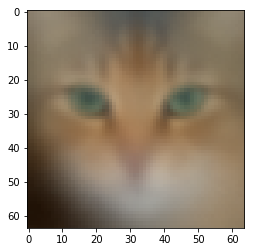

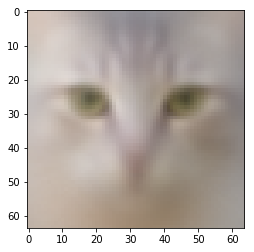

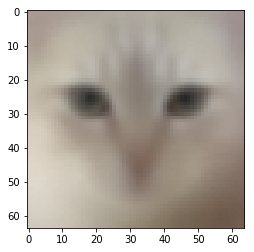

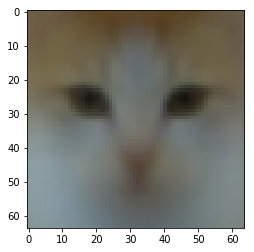

In [8]:
def reconstruct_images(image_data, k, sample_size):
    reconst = apply_pca(image_data, k, sample_size)
    for idx in range(reconst.shape[1]):
        image = []
        for dim_no in range(4096):
            image.append(np.array([reconst[0][idx][dim_no], reconst[1][idx][dim_no], reconst[2][idx][dim_no]]))
        plt.figure()
        plt.imshow(np.array(image).reshape((64,64,3)).astype('uint8'))
reconstruct_images(import_images(DATA_PATH_DIRECTORY), 10, 10)

PC analysis for red color: 
Proportion of variance preserved: 0.8655538273524259
Proportion of variance explained by eigenvalue 0 : 0.8655538273524259
PC analysis for green color: 
Proportion of variance preserved: 0.8425230088999569
Proportion of variance explained by eigenvalue 0 : 0.8425230088999569
PC analysis for blue color: 
Proportion of variance preserved: 0.816910336092947
Proportion of variance explained by eigenvalue 0 : 0.816910336092947


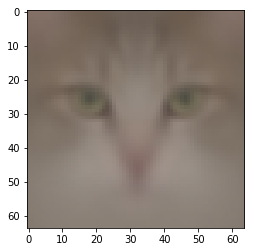

In [9]:
data = import_images(DATA_PATH_DIRECTORY)
reconstruct_images(data, 1, 1)

PC analysis for red color: 
Proportion of variance preserved: 0.9710930275548801
Proportion of variance explained by eigenvalue 0 : 0.8655538273524259
Proportion of variance explained by eigenvalue 1 : 0.023215160158111377
Proportion of variance explained by eigenvalue 2 : 0.0184029448145496
Proportion of variance explained by eigenvalue 3 : 0.012236007514589491
Proportion of variance explained by eigenvalue 4 : 0.00564648782020903
Proportion of variance explained by eigenvalue 5 : 0.004512292983287651
Proportion of variance explained by eigenvalue 6 : 0.004386308641114513
Proportion of variance explained by eigenvalue 7 : 0.003455723474857542
Proportion of variance explained by eigenvalue 8 : 0.003064709261186065
Proportion of variance explained by eigenvalue 9 : 0.0024808882111143743
Proportion of variance explained by eigenvalue 10 : 0.002181577277737511
Proportion of variance explained by eigenvalue 11 : 0.0017295722423521908
Proportion of variance explained by eigenvalue 12 : 0.00

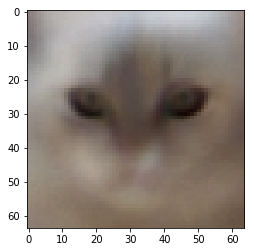

In [10]:
reconstruct_images(data, 50, 1)

PC analysis for red color: 
Proportion of variance preserved: 0.9876949416515255
Proportion of variance explained by eigenvalue 0 : 0.8655538273524259
Proportion of variance explained by eigenvalue 1 : 0.023215160158111377
Proportion of variance explained by eigenvalue 2 : 0.0184029448145496
Proportion of variance explained by eigenvalue 3 : 0.012236007514589491
Proportion of variance explained by eigenvalue 4 : 0.00564648782020903
Proportion of variance explained by eigenvalue 5 : 0.004512292983287651
Proportion of variance explained by eigenvalue 6 : 0.004386308641114513
Proportion of variance explained by eigenvalue 7 : 0.003455723474857542
Proportion of variance explained by eigenvalue 8 : 0.003064709261186065
Proportion of variance explained by eigenvalue 9 : 0.0024808882111143743
Proportion of variance explained by eigenvalue 10 : 0.002181577277737511
Proportion of variance explained by eigenvalue 11 : 0.0017295722423521908
Proportion of variance explained by eigenvalue 12 : 0.00

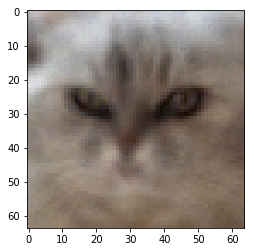

In [11]:
reconstruct_images(data, 250, 1)

PC analysis for red color: 
Proportion of variance preserved: 0.9925574534646754
Proportion of variance explained by eigenvalue 0 : 0.8655538273524259
Proportion of variance explained by eigenvalue 1 : 0.023215160158111377
Proportion of variance explained by eigenvalue 2 : 0.0184029448145496
Proportion of variance explained by eigenvalue 3 : 0.012236007514589491
Proportion of variance explained by eigenvalue 4 : 0.00564648782020903
Proportion of variance explained by eigenvalue 5 : 0.004512292983287651
Proportion of variance explained by eigenvalue 6 : 0.004386308641114513
Proportion of variance explained by eigenvalue 7 : 0.003455723474857542
Proportion of variance explained by eigenvalue 8 : 0.003064709261186065
Proportion of variance explained by eigenvalue 9 : 0.0024808882111143743
Proportion of variance explained by eigenvalue 10 : 0.002181577277737511
Proportion of variance explained by eigenvalue 11 : 0.0017295722423521908
Proportion of variance explained by eigenvalue 12 : 0.00

Proportion of variance explained by eigenvalue 82 : 0.00019286113124262084
Proportion of variance explained by eigenvalue 83 : 0.00018932516060406182
Proportion of variance explained by eigenvalue 84 : 0.00018596916399135692
Proportion of variance explained by eigenvalue 85 : 0.00018266141651902294
Proportion of variance explained by eigenvalue 86 : 0.00017766146707140818
Proportion of variance explained by eigenvalue 87 : 0.00017529577338568927
Proportion of variance explained by eigenvalue 88 : 0.00017362443452480008
Proportion of variance explained by eigenvalue 89 : 0.00016998608709695246
Proportion of variance explained by eigenvalue 90 : 0.00016897334693746904
Proportion of variance explained by eigenvalue 91 : 0.00016559624609032873
Proportion of variance explained by eigenvalue 92 : 0.0001641089279550532
Proportion of variance explained by eigenvalue 93 : 0.00016346241056696686
Proportion of variance explained by eigenvalue 94 : 0.00016047774811131114
Proportion of variance exp

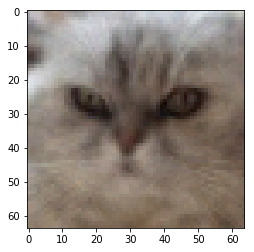

In [12]:
reconstruct_images(data, 500, 1)